### 练习2.4.1 

绘制函数$\displaystyle y = f(x) = x^3 - \frac{1}{x}$和其在$x = 1$处切线的图像。

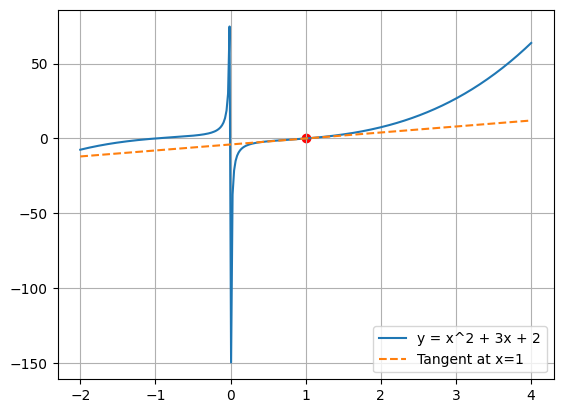

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.symbols('x')
y = x**3 - 1/x
dy_dx = sp.diff(y, x)

f = sp.lambdify(x, y, 'numpy')
df = sp.lambdify(x, dy_dx, 'numpy')

x0 = 1
y0 = f(x0)
slope = df(x0)

def tangent_line(x_val):
    return slope * (x_val - x0) + y0

x_vals = np.linspace(-2, 4, 300)
plt.plot(x_vals, f(x_vals), label='y = x^2 + 3x + 2')
plt.plot(x_vals, tangent_line(x_vals), '--', label='Tangent at x=1')
plt.scatter([x0], [y0], color='red')  # 切点
plt.legend()
plt.grid(True)
plt.show()

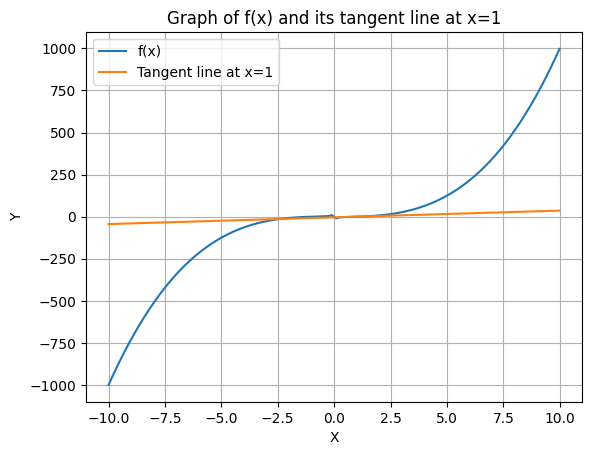

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 1/x

def f_tangent(f, point, x):
    h = 1e-10
    grad = (f(point + h) - f(point)) / h
    return grad*(x - point) + f(point)

# 避开 x=0，分段构造 x
x_left = np.arange(-10, -0.1, 0.01)
x_right = np.arange(0.1, 10, 0.01)
x = np.concatenate((x_left, x_right))

y = f(x)
y_tangent = f_tangent(f, 1, x)

plt.plot(x, y, label='f(x)')
plt.plot(x, y_tangent, label='Tangent line at x=1')
plt.legend()
plt.title('Graph of f(x) and its tangent line at x=1')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


### 练习2.4.2

求函数$f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$的梯度。

In [18]:
import torch
x = torch.arange(2.0, requires_grad=True)
print(x, type(x))
y = 3*(x[0]**2) + 5*torch.exp(x[1])
y.backward()

print(f"x.grad={x.grad}")
print(f"验证梯度, {x.grad==torch.tensor([6*x[0], 5*torch.exp(x[1])])}")


tensor([0., 1.], requires_grad=True) <class 'torch.Tensor'>
x.grad=tensor([ 0.0000, 13.5914])
验证梯度, tensor([True, True])


In [19]:
x = torch.arange(4.0, requires_grad=True)
y = torch.dot(x, x).sqrt()
y.backward()
print(x.grad)
print(f"验证结果 {x.grad == x/y}")

tensor([0.0000, 0.2673, 0.5345, 0.8018])
验证结果 tensor([True, True, True, True])


### 练习2.5.2 

在运行反向传播函数之后，立即再次运行它，看看会发生什么。

In [21]:
x = torch.arange(4.0, requires_grad=True)
y = torch.dot(x, x)
print(x)
y.backward(retain_graph=True)
print(x.grad)
try:
    y.backward()
    print(x.grad)
except Exception as e:
    print(e)

tensor([0., 1., 2., 3.], requires_grad=True)
tensor([0., 2., 4., 6.])
tensor([ 0.,  4.,  8., 12.])
